## Instructions
<strong> This Prac is assessed, and the tasks are based on the demos/content from labs / lecture / tutorial and their materials. </strong>

Complete the tasks given. 

* <strong>Make sure the R script submitted has no syntactical error, in which case a zero will be awarded for this Prac. Tutors will direct you on how to identify syntactical errors in your script.</strong>

Additional Note
* Variable names and strings are case-sensitive in R
* Use of any packages to achieve the objective is strictly prohibited - unless explicitly mentioned in the question to do so
* Any updates regarding the Pracs will be posted on <strong>[Ed discussion](https://edstem.org/au/courses/10549/discussion/)</strong>
* You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems

## Submission [After Prac 5]

This notebook, along with the "Prac3" and "Prac5" notebook will make up your "Practical Assessment 2" task which is worth 10% and is due **at 4pm on Friday May 5th (end of Week 10).** 

**Please refer to the submission guide on the LMS (Blackboard) for specific instructions.**

* If you are not working within the UQ zones, please ensure you upload your work to your jupyter notebook inside the UQ zone using the same folder as that of this notebook.

**NOTE:** Prac 4 (this prac) has two notebooks for assessment; 
 - Prac4 (Part 1) - Aggregate
 - Prac4 (Part 2) - Statistical Learning

# Statistical Learning

In this practical, you will be guided to apply what you learn about regression, classification and clustering to some datasets. We provide more detailed explanations for some of the concepts introduced in lecture, and introduce some new concepts. This notebook also introduces and illustrates some useful R libraries for regression, classification and clustering. You will find some problems that you need to solve throughout the notebook.

You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems.


## Supervised Learning

### Linear Regression

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

In [ ]:
dev.new(width=5, height=4) # set the figure size to be 5in x 4in

In [ ]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

**Fitting a linear model.**
We will fit a linear regression model to this data using the built-in `lm` function, with Father Heights (in) as the predictor, and Son Heights (in) as the response. The following illustrates how this can be done. You can learn more about the function by running `help(lm)` to read the function's documentation. 

In [ ]:
lmfit<-with(fs_height,lm(sheight~fheight))
summary(lmfit)

The summary information contains key information about the estimated model, including those that we covered in lecture.

|<center>TASK 1</center>|
| ---- |
| From the linear regression model above, how much does the son's height vary when father's height increases by 1 unit (exclude the error term). <br> Store the answer inside "fsCoef1" R variable. |

In [66]:
# [Place your Answer here]
fsCoef1 <- coef(lmfit)[2]
fsCoef1 

fheight 
0.5140059

|<center>TASK 2</center>|
| ---- |
| From the linear regression model above, what is the son's height when father's height is 0 (exclude the error term). <br> Store the answer inside "intCoef1" R variable. |

In [67]:
# [Place your Answer here]
intCoef1 <- coef(lmfit)[1]
intCoef1

(Intercept) 
    33.8928

**Checking model assumptions.**
Before taking the model seriously, we need to check whether the assumptions on our error model are satisfied. 

To do so, we need to explore the model's *residuals*, i.e., the differences between the actual values and the predicted values, or more precisely, the values of $y - \beta_{0} - \beta_{1} x$ for a simple linear model.

The assumption that we make on the residuals can be broken down into three assumptions
(1) zero mean; (2) constant variance, or homoscedasticity; and (3) normality.

Let's first extract the residuals, plot them, and compute summary statistics.

In [ ]:
lmfit.res<-resid(lmfit)
plot(fs_height$fheight,lmfit.res,
     main="Residual Son Heights from Simple Linear Regression", 
     xlab="Father Heights (in)",
     ylab="Residual Son Heights (in)",
     col=rgb(1,0.3,0.1,0.5))
summary(lmfit.res)

By examining the plot above, Assumption (1) seems reasonable.  Assumption (2) seems to hold for Father Heights in the range from about 63 in to 71 in.  Outside this range, there may be some *heteroscedasticity* (change in the variability).  However, it is relatively mild, and we will proceed as though this assumption is satistfied.

To check Assumption (3), we will create a quantile-quantile (Q-Q) plot of the empirical distribution of the residuals against the standard normal distribution. A Q-Q plot for two distributions is a plot of the quantiles of one distribution against those of another. From a practical point of view, it is sufficient to know that if the residuals come from a normal distribution, the points in the Q-Q plot should approximately lie on a straight line. For those interested in better understanding the Q-Q plot, the Wikipedia article on Q-Q plot is a good reference: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot.

A Q-Q plot can be conveniently generated in R using the `qqPlot` function from the `car` library. It allows us to generate the Q-Q plot together with a straight-line fit and pointwise 95% confidence intervals.

In [ ]:
library("car")
qqPlot(lmfit.res,xlab="Standard Normal Quantiles",ylab="Quantiles of the Residuals")

As we can see from the plot, the bulk of the residual quantiles appear to follow a normal distribution, with slightly heavier left and right *tails*, suggesting a mild departure from the Assumption (3).

Besides using the Q-Q plot as a graphical test for Assumption (3), we can also formally test it by carrying out a Shapiro-Wilk test. The Shapiro-Wilk test computes a summary statistic $W$ from the residuals, and then computes the  whether probability (p-value) of observing the value of $W$ assuming the *null hypothesis* that the data come from a normal distribution. A small p-value indicates that something unusual happens if the null hypothesis is true, and thus we consider the null hypothesis unlikely.

In [ ]:
shapiro.test(lmfit.res)

Since the p-value is very small, we reject the null hypothesis in favour of the alternative hypothesis that the data do not come from a normal distribution. This is in line with our Q-Q plot suspicion. What this implies is that strictly speaking, any further statistical test should be taken with a grain of salt. At the same time, note that the violation of the normality assumption appears to be mild (subjectively), and we may still proceed to take the model seriously for further analysis.

**Goodness of fit.**
Now, let's return to the model summary.

In [ ]:
summary(lmfit)

Because the p-values for both intercept and fheight are extremely small, this suggests that they are unlikely to be equal to zero.  

|<center>TASK 3</center>|
| ---- |
| State TRUE/FALSE for the following question. <br> R-square decreases as sum of square errors increases (with constant sum of square regression) <br> R-square is close to 0 if there is no relationship between dependent and independent variable in simple linear regression <br> R-square is zero (or undefined) if regression equation contains only the intercept term. <br> Store the boolean answers inside "boolean1" vector in the same sequence as that of questions. |

In [ ]:
# [Place your Answer here]
boolean1 <- c(FALSE, TRUE, TRUE)

**Uncertainty in model parameters.**
The estimated parameters are random, because they are computed from a random sample from a simple linear model. If the data is indeed generated by a simple linear model, then when the sample size is large, the estimated parameters will be close to the true parameters. The confidence interval (CI) is often used as a way to describe how accurate the estimates are. A CI with confidence level $p$ is an interval that has probability $p$ of containing the true value. Be very careful when interpreting this statement: here the true value is unknown but fixed, and the CI is random (due to randomness in the sample). The statement thus means that if we use the same procedure to construct a level $p$ CI on many many samples, a fraction $p$ of the intervals will contain the true value.

In R, the `confint` function can be used to obtain confidence intervals. By default, a 95% confidence interval is returned.

In [ ]:
confint(lmfit)

Thus a 95% CI for the intercept is [30.2963477, 37.489253], and a 95% CI for fheight is [0.4609158, 0.567096]. It should be emphasized that once the CIs have been calculated, the true parameters are either in the intervals or not. What we can say is that a larger CI indicates higher uncertainty in the estimate.

**Predition.**
We can use the fitted linear model to make predictions on data. Such predictions are uncertain as well, and 
we can construct confidence intervals for the predictions to quantify our degree of uncertainty in the prediction. If the estimated linear equation is $y = \hat{\beta}_{0} + \hat{\beta}_{1} x$, then given any $x$, we can simply use the RHS as a point estimate. This can be done using the `predict` function as illustrated below.

In [ ]:
predict(lmfit, data.frame(fheight=67))

Note that if you want to read the documentation of the `predict` function, you need to type `help(predict.lm)` in this case.

|<center>TASK 4</center>|
| ---- |
| Modify `return` statement in the below function such that it predicts the son's height (using co-efficients of lmfit model built previously) when father's height is passed as argument. <br> The answer should be rounded to two decimal places. <br> DO NOT change anything other than the equation in the `return` statement . |

In [68]:
modelFun = function(x) {
    predict = 5 ;
    return(round(coef(lmfit)[1]+(coef(lmfit)[2]*x), 2))
}

equa1 = modelFun(123)

(Intercept) 
      97.12

The point prediction above is generally different from the true value due to two sources of randomness: (a) the estimated parameters are random and only approximate; (b) the simple linear model has an error term. 

When we consider the uncertainty in the prediction, we may only consider (a), or consider both (a) and (b). If we consider only (a), we can construct a confidence interval for $\hat{\beta}_{0} + \hat{\beta}_{1} x$ - while the distribution of this prediction has a very complex form, we can again use the `predict` function to help us to obtain a CI. A 95% CI for sheight when fheight=67 in is given below.

In [ ]:
predict(lmfit,data.frame(fheight=67),interval="confidence",level = 0.95,type="response")

Now, let's construct a plot of the data, the fitted regression line, and a pointwise 95% confidence interval for the regression line.

In [ ]:
newfheight<-seq(min(fheight$fheight)-1, max(fheight$fheight)+1, by=0.1)
lmfitci<-predict(lmfit,data.frame(fheight=newfheight),interval="confidence",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitci[,1],col="black",lty=1)
lines(newfheight,lmfitci[,2],col="black",lty=2)
lines(newfheight,lmfitci[,3],col="black",lty=2)

Frequently, we are often interested to take both the uncertainty in the parameter estimates and the uncertainty due to the error term into account, and produce an interval that captures both forms of uncertainty. This would give us the typical range of responses be for a particular predictor value.

Such interval is called a *prediction interval*.  Let's construct a 95% prediction interval for a predictor of 67 in.

In [ ]:
predict(lmfit,data.frame(fheight=67),interval="predict",level=0.95,type="response")

You will notice immediately that this interval is significantly wider than the confidence interval we computed earlier.

|<center>TASK 5</center>|
| ---- |
| Find pointwise 95% prediction interval of the regression line for the father's heights (newfheight) given below. <br> Store the answer inside "pInt" matrix. |

In [71]:
# [Place your Answer here]
newfheight<-seq(58,76)
lmfitci <- predict(lmfit,data.frame(fheight=newfheight),interval="prediction")
pInt <- lmfitci[, c("lwr", "upr")]
pInt

,lwr,upr
1,58.89134,68.51895
2,59.41073,69.02757
3,59.92953,69.53678
4,60.44776,70.04656
5,60.96540,70.55694
6,61.48245,71.06789
7,61.99892,71.57943
8,62.51480,72.09157
9,63.03010,72.60428
10,63.54480,73.11759


|<center>TASK 6</center>|
| ---- |
| For the (fheight, sheight) pairs in the dataset, calculate the proportion of sheight that fall into the 95% prediction interval for fheight. <br> Store the answer inside "prop1" variable, rounded to 2 decimal places using `round` statement. |

In [72]:
# [Place your Answer here]

interval <-  fs_height[fs_height$fheight >= 58 & fs_height$fheight <= 76 & fs_height$sheight >= pInt[, "lwr"] & fs_height$sheight <= pInt[, "upr"],]
prop1 <- round(nrow(interval)/nrow(fs_height),2)
prop1

Warning message in fs_height$sheight >= pInt[, "lwr"]:
“longer object length is not a multiple of shorter object length”
Warning message in fs_height$sheight <= pInt[, "upr"]:
“longer object length is not a multiple of shorter object length”


[1] 0.77

All the above analysis has been carried out on the training set only. To evaluate whether the simple linear model can possibly generalize to new data, we need to train it on a training set, and evaluate it on a test set.
Let's first construct a 70/30 train-test split using Pearson's dataset.

In [ ]:
N = length(fheight$fheight)
set.seed(107)
trainidx = sample(1:N, floor(0.7*N), replace=FALSE)
tr = data.frame(fheight=fheight$fheight[trainidx], sheight=sheight$sheight[trainidx])
ts = data.frame(fheight=fheight$fheight[-trainidx], sheight=sheight$sheight[-trainidx])

|<center>TASK 7</center>|
| ---- |
| Train a simple linear model using the training set (fheight_tr, sheight_tr). <br> Store the MSEs of the model on the training set (fheight_tr, sheight_tr) and the test set (fheight_ts, sheight_ts) in "mseTrain1" and "mseTest1" variables respectively, rounded to 2 decimal places using `round` function. <br> Compare the MSEs and comment on the model's ability to generalize to new examples.

In [73]:
# [Place your Answer here].  Include the desciptive portion of the answer as an R comment.
pred <- predict(lmfit,data.frame(fs_height),interval="prediction")
model <- lm(sheight ~ fheight, data = tr)
train <- predict(model, newdata = tr)
test <- predict(model, newdata = ts)
mseTrain <- round(mean((tr$sheight - train)^2), 2)
mseTest <- round(mean((ts$sheight - test)^2), 2)
mseTrain
mseTest
# test is lower then train, it means this model can not make a accurate prediction.

[1] 5.89

[1] 6.06

### Logistic Regression

Let's return to the HR analytics data from Prac. 3.

To think about trying to predict the likelihood of our best and most experienced employees leaving based on the average monthly hours worked.

To that end, we'll load up the data and subset out the best (evaluation of 0.8 or higher) and the most experienced employees (with the company for 4 or more years).  We'll also create a training and test set.

In [ ]:
library("readr")
HR_comma_sep <- read_csv("HR_comma_sep.csv")
HR_best <- HR_comma_sep[(HR_comma_sep$last_evaluation>=0.8)&(HR_comma_sep$time_spend_company>=4),]
head(HR_best,10)
summary(HR_best)
set.seed(8888) # Set a seed for the random number generator;
trainidx<-sample(nrow(HR_best), floor(nrow(HR_best) * 0.5))
HR_best_train<-HR_best[trainidx,]
HR_best_test<-HR_best[-trainidx,]

Next, we'll plot `left` vs `Average Monthly Hours` in our training set as a scatterplot.

In [ ]:
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))

It is clear from this plot that the more hours they work on average, the more likely that the best and most experienced employees will leave.

Let's fit a logistic regression model to the data, and plot the resulting regression curve. This can be done using the built-in `glm` function, with the `family` argument set to `binomial`.

In [ ]:
logfit<-glm(left~average_montly_hours,data=HR_best_train,family=binomial)
summary(logfit)
newamh<-seq(96,310)
predprobs<-predict(logfit,data.frame(average_montly_hours=newamh),type="response")
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)

|<center>TASK 8</center>|
| ---- |
| For every 1 hour increase in average monthly hours worked, the log odds of leaving increase by how much ? <br> Store the answer inside "logOdds1" variable. |

In [74]:
# [Place your Answer here]
logfit <- glm(left ~ average_montly_hours, data = HR_best_train, family = binomial)
logOdds1 <- coef(logfit)["average_montly_hours"]
logOdds1

average_montly_hours 
          0.03815976

### Classification

We can use a threshold together with the regression curve to create two groups.  We can also observe the training error and test error we make.

Let's start with a threshold of 0.5.

In [ ]:
HR_best_train$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_train$average_montly_hours),type="response")
HR_best_train$predleft<-as.integer(HR_best_train$probs>=0.5)
table(HR_best_train$predleft,HR_best_train$left)

HR_best_test$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_test$average_montly_hours),type="response")
HR_best_test$predleft<-as.integer(HR_best_test$probs>=0.5)
table(HR_best_test$predleft,HR_best_test$left)

|<center>TASK 9</center>|
| ---- |
| What are the (1) error rate, (2) sensitivity, (3) specificity, and (4) precision in Training and Testing for this classifier? <br> Store the answer inside "errorRateTrain1", "errorRateTest1", "sensitivityTrain1", "sensitivityTest1", "specificityTrain1", "specificityTest1", "precisionTrain1", "precisionTest1". |

In [75]:
# [Place your Answer here]
errorRateTrain1 <- mean(HR_best_train$predleft != HR_best_train$left)
sensitivityTrain1 <- sum(HR_best_train$predleft == 1 & HR_best_train$left == 1)/sum(HR_best_train$left == 1)
specificityTrain1 <- sum(HR_best_train$predleft == 0 & HR_best_train$left == 0)/sum(HR_best_train$left == 0)
precisionTrain1 <- sum(HR_best_train$predleft == 1 & HR_best_train$left == 1)/sum(HR_best_train$predleft == 1)
errorRateTest1 <- mean(HR_best_test$predleft != HR_best_test$left)
sensitivityTest1 <- sum(HR_best_test$predleft == 1 & HR_best_test$left == 1)/sum(HR_best_test$left == 1)
specificityTest1 <- sum(HR_best_test$predleft == 0 & HR_best_test$left == 0)/sum(HR_best_test$left == 0)
precisionTest1 <- sum(HR_best_test$predleft == 1 & HR_best_test$left == 1)/sum(HR_best_test$predleft == 1)
errorRateTrain1
sensitivityTrain1
specificityTrain1
precisionTrain1
errorRateTest1
sensitivityTest1
specificityTest1
precisionTest1

[1] 0.2013699

[1] 0.9046512

[1] 0.6466667

[1] 0.7858586

[1] 0.2046543

[1] 0.921147

[1] 0.6266026

[1] 0.7679283

|<center>TASK 10</center>|
| ---- |
| Perform two fold cross-validation (CV) of the logistic regression classifier above on the training set. <br> Store the cross-validation error (the average of the error rates on the two folds) in "cv1" variable. Round "cv1" to 1 decimal place using `round` fn.<br> Set the seed of sampling to 55. |

In [76]:
# [Place your Answer here]
library(boot)
set.seed(55)
n <- nrow(HR_best_train)
folds <- sample(rep(1:2, each = n %/% 2), n)
errors <- numeric(2)
for (i in 1:2) {
  train <- HR_best_train[folds != i, ]
  valid <- HR_best_train[folds == i, ]
  logfit <- glm(left ~ average_montly_hours, data = train, family = "binomial")
  pred <- predict(logfit, newdata = valid, type = "response")
  pred <- as.integer(pred >= 0.5)
  errors[i] <- sum(pred != valid$left) / nrow(valid)
}
cv1 <- mean(errors)
cv1 <- round(cv1, 1)
cv1

[1] 0.2

The quantities we computed above were just for a single choice of threshold.  We can gauge the tradeoff between true positive rates (sensitivity) and false positive rates (1-specificity) by trying all possible thresholds. This allows us to generate a plot of true positive rate against the false positive rate - a curve known the ROC (receiver operating characteristic) curve.

We'll do this now for both the training data, as well as computing the AUC (Area Under the Curve).
**Note:** We will need to install the "ROCR" package. Please see the following Ed discussion if you need help installing this package outside of the Jupyter environment: https://edstem.org/au/courses/10549/discussion/1271472


In [ ]:
install.packages("ROCR")
library("ROCR")
trainROC<-performance(prediction(HR_best_train$probs,HR_best_train$left),"tpr","fpr")
plot(trainROC)
abline(a=0, b= 1,lty=2)
trainAUC<-as.double(performance(prediction(HR_best_train$probs,HR_best_train$left),"auc")@y.values)
trainAUC

|<center>TASK 11</center>|
| ---- |
| Construct the ROC curve for the test data, and compute the AUC and store the same in "auc1" (rounded to 4 decimal places). |

[1] 0.8351

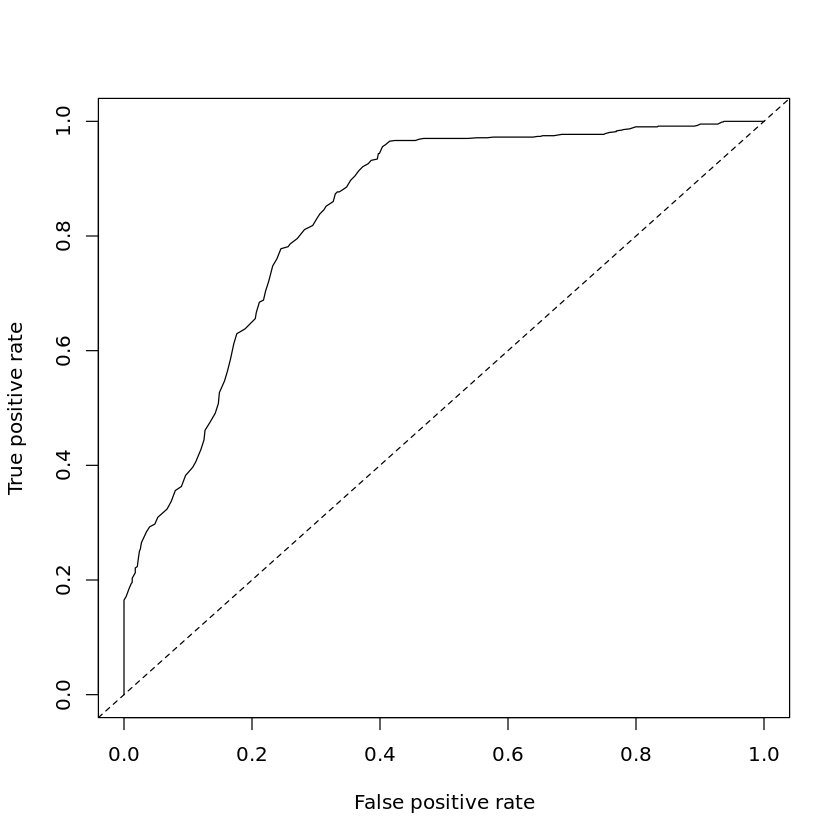

In [77]:
# [Place your Answer here]
testROC<-performance(prediction(HR_best_test$probs, HR_best_test$left),"tpr","fpr")
plot(testROC)
abline(a = 0, b = 1, lty = 2)
auc1 <- as.numeric(performance(prediction(HR_best_test$probs, HR_best_test$left), "auc")@y.values)
auc1 <- round(auc1, 4)
auc1

Of course, we have been ignoring all of the other predictors so far.

It is simple enough to modify the logistic regression to include others we have identified as important from Prac. 3.

Let's include satisfaction level, number of projects, and their interactions.

In [ ]:
logfit2<-glm(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train,family=binomial)
summary(logfit2)

Whilst the interpretation of the estimated coefficients becomes trickier for this model, for this practical we're only interested in its classification performance.

Let's evaluate the training performance of the classifier associated with this more complicated logistic regression model.

In [ ]:
HR_best_train$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_train$average_montly_hours,satisfaction_level=HR_best_train$satisfaction_level,number_project=HR_best_train$number_project),type="response")
trainROC2<-performance(prediction(HR_best_train$probs2,HR_best_train$left),"tpr","fpr")
plot(trainROC2)
abline(a=0, b= 1,lty=2)
trainAUC2<-as.double(performance(prediction(HR_best_train$probs2,HR_best_train$left),"auc")@y.values)
trainAUC2

Of course, the model fitted using more predictors produces a better classifier for the training data.

|<center>TASK 12</center>|
| ---- |
| Construct the ROC curve for the test data and store the AUC for the new logistic regression model in "auc2" (rounded to 4 decimal places). What do you observe?  Comment on one potential pitfall associated with more complex models. |

[1] 0.9136

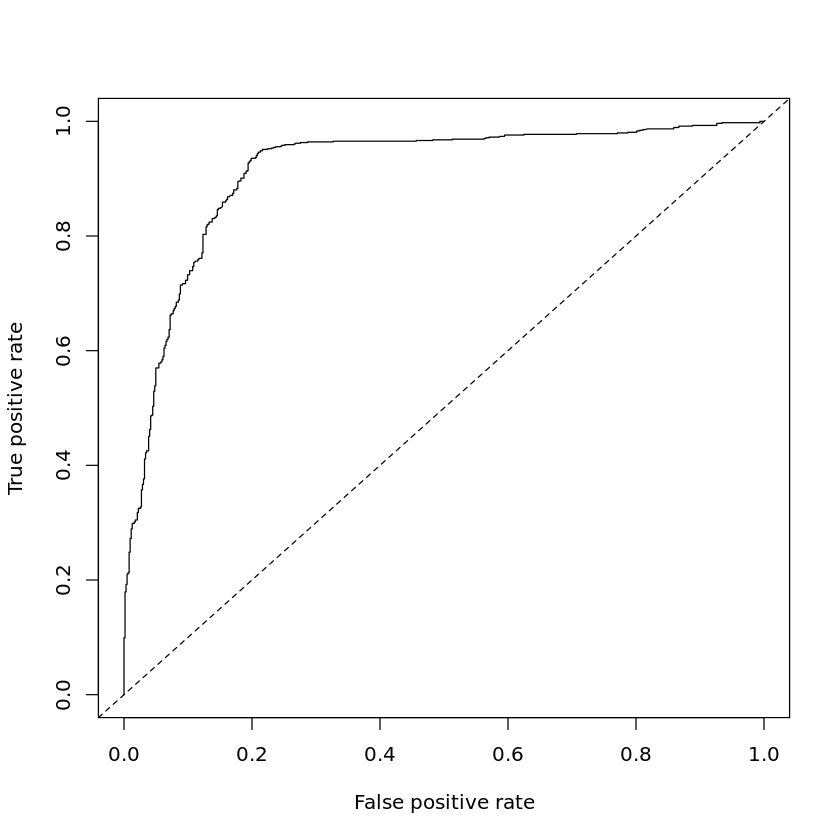

In [78]:
# [Place your Answer here].  Include the desciptive portion of the answer as an R comment.
logfit2<-glm(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_test,family=binomial)
HR_best_test$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
testROC2<-performance(prediction(HR_best_test$probs2,HR_best_test$left),"tpr","fpr")
plot(testROC2)
abline(a=0, b= 1,lty=2)
auc2<-as.double(performance(prediction(HR_best_test$probs2,HR_best_test$left),"auc")@y.values)
auc2 <- round(auc2, 4)
auc2
#the more complex model with additional predictors has better predictive power.

**Model selection.** Next task explores CV's ability to select a good model.

|<center>TASK 13</center>|
| ---- |
| Calculate the 2-fold CV error of the more complex logistic regression classifier on the training set. Use the same two folds as for the old classifier, and use 0.5 as the threshold too. <br> Store the error inside "cv2" variable. Round "cv2" to 1 decimal place using `round` function. <br>Does two fold CV help to find the classifier with better test set performance? Explain your answer.|

In [79]:
# [Place your Answer here]
set.seed(55)
HR_best_train$fold <- factor(rep(1:2, length.out = nrow(HR_best_train)))
logfit2_fold1 <- glm(left ~ average_montly_hours*satisfaction_level*number_project, data = HR_best_train[HR_best_train$fold == 1,], family = binomial)
probs2_fold2 <- predict(logfit2_fold1, data.frame(average_montly_hours = HR_best_train[HR_best_train$fold == 2,]$average_montly_hours, satisfaction_level = HR_best_train[HR_best_train$fold == 2,]$satisfaction_level, number_project = HR_best_train[HR_best_train$fold == 2,]$number_project), type = "response")
class2_fold2 <- ifelse(probs2_fold2 > 0.5, 1, 0)
error2_fold2 <- mean(class2_fold2 != HR_best_train[HR_best_train$fold == 2,]$left)
logfit2_fold2 <- glm(left ~ average_montly_hours*satisfaction_level*number_project, data = HR_best_train[HR_best_train$fold == 2,], family = binomial)
probs2_fold1 <- predict(logfit2_fold2, data.frame(average_montly_hours = HR_best_train[HR_best_train$fold == 1,]$average_montly_hours, satisfaction_level = HR_best_train[HR_best_train$fold == 1,]$satisfaction_level, number_project = HR_best_train[HR_best_train$fold == 1,]$number_project), type = "response")
class2_fold1 <- ifelse(probs2_fold1 > 0.5, 1, 0)
error2_fold1 <- mean(class2_fold1 != HR_best_train[HR_best_train$fold == 1,]$left)
cv2 <- mean(c(error2_fold1, error2_fold2))
cv2 <- round(cv2, 1)
cv2
#The results showed that the more complex classifier did not result in a significant improvement in performance compared to the simpler one.

[1] 0.1

### Other Classification Techniques

It is relatively easy to carry out classification using other supervised learning techniques.

There are very well-written implementations of many other algorithms not discussed in this course, such as LDA (linear discriminative anaysis), QDA (quadratic discriminative analysis). Training and prediction using these models can generally be done using functions with similar structure as in previous examples, except that there may be algorithm specific parameters that we need to specify.

We illustrate how to construct an LDA-based classifier using the three predictors and their interactions we had before, and evaluate it on our test data.

In [ ]:
library("MASS")
ldafit<-lda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(ldafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs3<-temp$posterior[,2]
testROC3<-performance(prediction(HR_best_test$probs3,HR_best_test$left),"tpr","fpr")
plot(testROC3)
abline(a=0, b= 1,lty=2)
testAUC3<-as.double(performance(prediction(HR_best_test$probs3,HR_best_test$left),"auc")@y.values)
testAUC3

In addition to linear discriminant analysis, the `MASS` package has support for quadratic discriminant analysis via the command `qda`.  The `class` package has support for K nearest neighbours via `knn` and the `e1071` package has support for support vector machines via `svm`.

## Unsupervised Learning

As a final exercise, let's subset all of our employee data again (not only best) to only include those that have left.

In Prac. 3, we visually identified several *clusters* of leavers.  We will now use the k-means clustering algorithm to capture these clusters.

In [ ]:
HR_left<-HR_comma_sep[HR_comma_sep$left==1,]
head(HR_left)

Now, let's focus on three variables: average monthly hours, satisfaction level, and last evaluation.

In [ ]:
library("ggplot2") # Expanded plotting functionality over "lattice" package
x<-cbind(HR_left$average_montly_hours,HR_left$satisfaction_level,HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random sets of (distinct) rows in x as initial centres.
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

One thing you will notice is that the three clusters that are found are not what we would expect.

This is because the variables are on different scales; since average monthly hours takes on values so much larger than  satisfaction level and last evaluation, the algorithm effectively prioritises just this variable.

A quick remedy to this problem is achieved by adjusting the scale of satisfaction level and last evaluation by a factor of 100.

In [ ]:
x<-cbind(HR_left$average_montly_hours,100*HR_left$satisfaction_level,100*HR_left$last_evaluation)
set.seed(55)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random restarts
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

|<center>TASK 14</center>|
| ---- |
| Which cluster (index) has most data points. Store the answer inside "cluster1" variable. <br> Partition the dataset into the three clusters we have just identified.  Use quantitative and visual EDA to explore the typical characteristics of each cluster.  Based on this, what is a possible explanation for the clusters? |

In [ ]:
# [Place your Answer here].  Include the desciptive portion of the answer as an R comment.
cluster1 <- which.max(table(kmfit$cluster))
cluster1
library("ggplot2")
ggplot(data=data.frame(x, cluster=kmfit$cluster), aes(x=x[,1], y=x[,2], color=factor(cluster))) +
  geom_point() +
  labs(title="Cluster Plot") +
  xlab("Average Monthly Hours") +
  ylab("Satisfaction Level")
# we can find the left people have larger average monthly hours for working and satusfaction level is not too high.

In [ ]:
print("This Line gets printed if there is no error, when Kernel -> Restart & Run All")